In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import torch
from torch import optim, nn
from math import exp

import numpy as np

from tqdm import tqdm
from random import randint

from load_dataset import load_dataset, plot_image
from auto_encoder2 import PAutoE

device = "cuda"

pimages = load_dataset().to(device)

In [3]:
T = 30
beta = torch.linspace(10e-4, 0.2, T)

alpha = 1 - beta

alpha_ = torch.zeros(T)

for i in range(T):
    alpha_[i] = torch.prod(alpha[0:i+1])

alpha_

tensor([0.9990, 0.9911, 0.9766, 0.9555, 0.9283, 0.8955, 0.8577, 0.8157, 0.7701,
        0.7218, 0.6715, 0.6202, 0.5685, 0.5172, 0.4670, 0.4185, 0.3721, 0.3283,
        0.2874, 0.2497, 0.2152, 0.1839, 0.1560, 0.1312, 0.1095, 0.0906, 0.0743,
        0.0605, 0.0488, 0.0390])

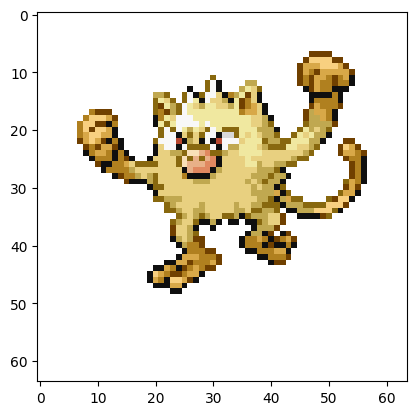

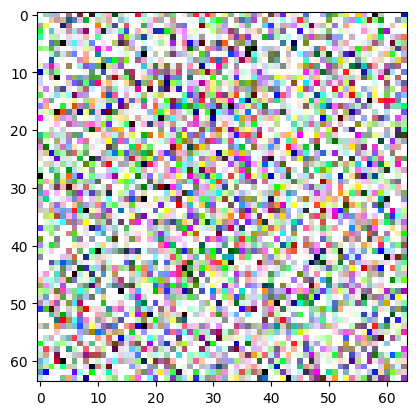

In [4]:
t = 28
x0 = pimages[0][55]

z = torch.randn(x0.shape).to(device)
xt = x0 * torch.sqrt(alpha_[t]) + z * torch.sqrt(1-alpha_[t])

plot_image(x0)
plot_image(xt)

In [5]:
for t in range(T):

    print(f"t = {t}")

    model = PAutoE(4, 4).to(device)

    loss_func = nn.MSELoss()    
    #optimizer = optim.SGD(model.parameters(), lr=1e-1)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
        
    pbar = tqdm(range(10001))
    def closure():
        optimizer.zero_grad()

        source = randint(0, 2)
        batch = torch.randperm(385)[:8]
        x0 = pimages[source][batch]

        e = torch.randn(x0.shape, device=device)
        
        x_nois = torch.sqrt(alpha_[t]) * x0 + torch.sqrt(1-alpha_[t]) * e
        e_pred = model(x_nois)

        # Calculate the loss between the result and the noise
        loss = loss_func(e, e_pred)
        loss.backward()
        
        pbar.set_description(f"%.8f" % loss)
        
        return loss
            
    model.train()
    for j in pbar:
        optimizer.step(closure)

    script = torch.jit.script(model)
    script.save(f"./model_{t}.pt")

t = 0


0.18244456: 100%|████████████████████████████████████████████████| 10001/10001 [03:58<00:00, 41.90it/s]


t = 1


0.11792803: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.79it/s]


t = 2


0.06981891: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.65it/s]


t = 3


0.07931162: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.64it/s]


t = 4


0.06932753: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.57it/s]


t = 5


0.06084210: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.65it/s]


t = 6


0.07987643: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.63it/s]


t = 7


0.04750844: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.62it/s]


t = 8


0.05470484: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.65it/s]


t = 9


0.05012103: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.62it/s]


t = 10


0.03507752: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.65it/s]


t = 11


0.03696148: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.65it/s]


t = 12


0.02451282: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.63it/s]


t = 13


0.02975114: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.62it/s]


t = 14


0.03561050: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.61it/s]


t = 15


0.02678099: 100%|████████████████████████████████████████████████| 10001/10001 [04:03<00:00, 41.12it/s]


t = 16


0.03491294: 100%|████████████████████████████████████████████████| 10001/10001 [04:01<00:00, 41.34it/s]


t = 17


0.02264887: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.55it/s]


t = 18


0.02463615: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.64it/s]


t = 19


0.02170810: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.66it/s]


t = 20


0.05108606: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.69it/s]


t = 21


0.01706881: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.72it/s]


t = 22


0.01619143: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.67it/s]


t = 23


0.01236715: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.69it/s]


t = 24


0.01095695: 100%|████████████████████████████████████████████████| 10001/10001 [04:00<00:00, 41.63it/s]


t = 25


0.01173173: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.74it/s]


t = 26


0.01081829: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.69it/s]


t = 27


0.00947785: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.70it/s]


t = 28


0.00729711: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.71it/s]


t = 29


0.00719720: 100%|████████████████████████████████████████████████| 10001/10001 [03:59<00:00, 41.72it/s]
